<font size=5>Imports </font>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<font size=5> Reading Data </font>

In [22]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<font size=5> Data Preprocessing </font>

In [23]:
df = df.replace('?', np.NaN)
df = df.dropna()
df = df[(df["chol"]>0)& (df["thalach"]>0) & (df["trestbps"]>0)]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<font size=5>Data Visualization </font>

<AxesSubplot:xlabel='age', ylabel='Count'>

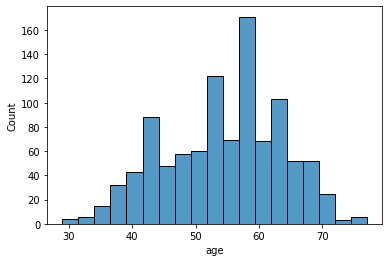

In [24]:
sns.histplot(df["age"])

<AxesSubplot:xlabel='age', ylabel='chol'>

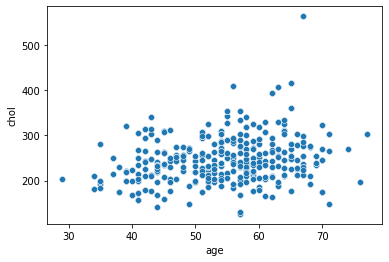

In [25]:
sns.scatterplot(df["age"], df["chol"])

<AxesSubplot:xlabel='sex', ylabel='chol'>

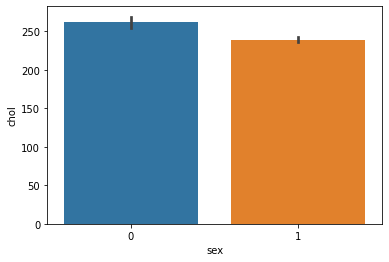

In [26]:
sns.barplot(df["sex"],df["chol"])

<AxesSubplot:xlabel='age', ylabel='chol'>

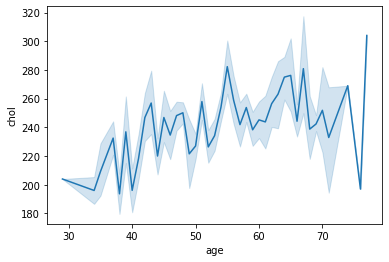

In [27]:
sns.lineplot(df["age"], df["chol"])

<AxesSubplot:xlabel='chol'>

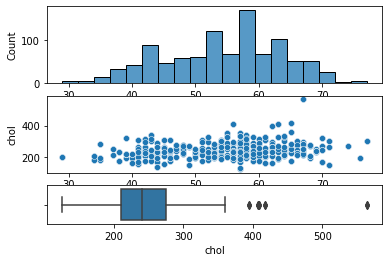

In [40]:
f , (ax_hist ,ax_scat, ax_box) = plt.subplots(3 ,  gridspec_kw={"height_ratios": (.4, .4, .2)})

sns.histplot(df["age"], ax=ax_hist)
sns.scatterplot(df["age"], df["chol"], ax=ax_scat)
sns.boxplot(df["chol"], ax=ax_box)

In [58]:
child = 0
adult = 0
old = 0
for i in df["age"]:
    if i<18 :
       child += 1
    elif i>60:
        old += 1
    else :
        adult += 1

age_dict = {'children' : child, 'adults' : adult, 'old' : old}
age_df = pd.DataFrame.from_dict([age_dict])
age_df = age_df.transpose()
age_df.columns=["Count"]
age_df

,Count
children,0
adults,753
old,272


<AxesSubplot:ylabel='Count'>

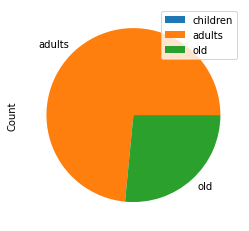

In [59]:
age_df.plot.pie(y="Count")

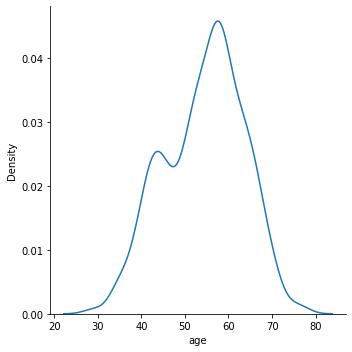

In [89]:
sns.displot(df["age"], kind="kde" )

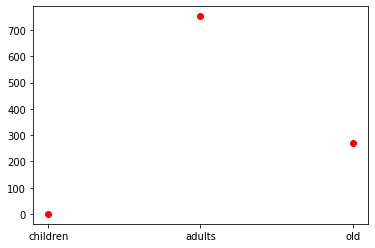

In [92]:
plt.plot(age_df["Count"], 'ro')

<AxesSubplot:xlabel='chol'>

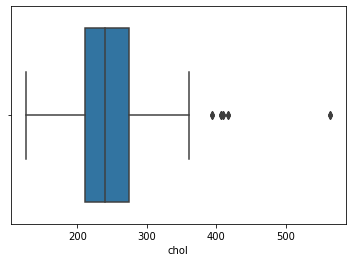

In [41]:
sns.boxplot(df["chol"])

<AxesSubplot:xlabel='age', ylabel='chol'>

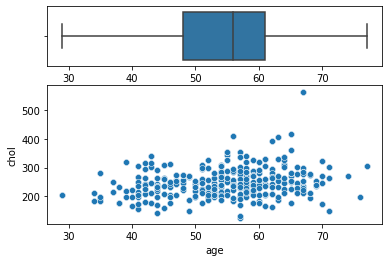

In [77]:
f, (ax_box, ax_scat) = plt.subplots(2, gridspec_kw={"height_ratios":(0.3, 0.7)})
sns.boxplot(df["age"], ax=ax_box)
sns.scatterplot(df["age"], df["chol"], ax=ax_scat)
